In [1]:
from datetime import date
import covidcast

In [2]:
data = covidcast.signal("fb-survey", "smoothed_wearing_mask",
                        date(2020, 10, 15), date(2020, 11, 15),
                        "county")

In [3]:
data.head()

,geo_value,signal,time_value,direction,issue,lag,value,stderr,sample_size,geo_type,data_source
0,01000,smoothed_wearing_mask,2020-10-15,None,2020-10-20,5,80.766252,1.052617,1402.0167,county,fb-survey
1,01003,smoothed_wearing_mask,2020-10-15,None,2020-10-20,5,77.719795,2.641983,248.0794,county,fb-survey
2,01069,smoothed_wearing_mask,2020-10-15,None,2020-10-20,5,84.093303,3.569991,104.9560,county,fb-survey
3,01073,smoothed_wearing_mask,2020-10-15,None,2020-10-20,5,89.051162,1.888443,273.4008,county,fb-survey
4,01089,smoothed_wearing_mask,2020-10-15,None,2020-10-20,5,88.233309,1.584592,413.4776,county,fb-survey


In [42]:
data1 = covidcast.signal("fb-survey", "smoothed_wearing_mask",
                        date(2020, 9, 15), date(2020, 11, 15),
                        "state")

In [43]:
data1["value"].mean()

86.04388452580645

In [41]:
data1.to_csv('mask_data.csv')

In [44]:
data1.groupby('issue', as_index=False)['value'].mean()

,issue,value
0,2020-10-05,84.775584
1,2020-10-06,84.817314
2,2020-10-07,84.942005
3,2020-10-08,85.026100
4,2020-10-09,85.205550
5,2020-10-10,85.482772
6,2020-10-11,85.541935
7,2020-10-12,85.716349
8,2020-10-13,85.778984
9,2020-10-14,85.788821


In [36]:
data1.groupby(['issue', 'geo_value'], as_index=False)['value'].mean()

,issue,geo_value,value
0,2020-10-20,ak,81.671348
1,2020-10-20,al,83.358056
2,2020-10-20,ar,85.349818
3,2020-10-20,az,86.758212
4,2020-10-20,ca,91.193597
...,...,...,...
1423,2020-11-16,vt,94.066530
1424,2020-11-16,wa,92.591409
1425,2020-11-16,wi,89.341925
1426,2020-11-16,wv,86.127823


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

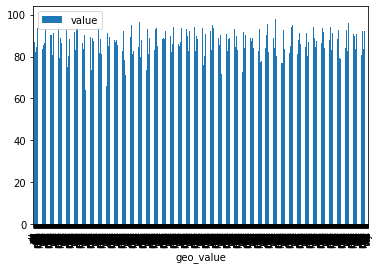

In [10]:
ax = data1.plot.bar(x='geo_value', y='value')

In [20]:
import requests
import json

In [21]:
url = "https://static01.nyt.com/elections-assets/2020/data/api/2020-11-03/race-page/pennsylvania/president.json"
r = requests.get(url)

In [23]:
cont = r.json()

In [25]:
import pandas as pd

In [27]:
type(cont)

dict

In [32]:
new = pd.DataFrame.from_dict(cont)

,data,meta
races,"[{'race_id': 'PA-G-P-2020-11-03', 'race_slug':...",NaN
party_control,"[{'race_type': 'house', 'state_id': '', 'neede...",NaN
liveUpdates,"[{'id': 544, 'author': 'Stephanie Saul', 'auth...",NaN
version,NaN,18035
track,NaN,2020-11-03
timestamp,NaN,2020-11-16T18:55:55.087Z


In [45]:
import os

In [46]:
os.getcwd()

'/Users/mikecave/Desktop/book_covid'